# Grouping objects

The `Group` class is used to group items together.  This allows you to then manipulate the whole Group as a single object.  This is similar to the "selection" and "group" functionality in Inkscape/Adobe Illustrator, where you can highlight several objects (by e.g. shift-clicking) and move them together.

You can manipulate a Group like any other phidl object, such as:

- move()
- rotate()
- mirror()
- align() 
- distribute()
- and the usual list of attributes (xmin, ymax, center, bbox, etc)

## Creating and manipulating a Group

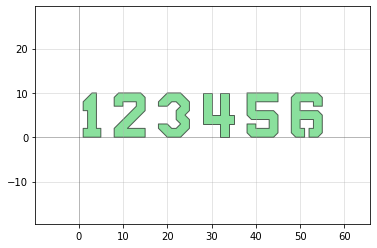

In [1]:
import numpy as np
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

from phidl import Group

# Create a blank Device and add number shapes to it
D = Device()
t1 = D << pg.text('1')
t2 = D << pg.text('2')
t3 = D << pg.text('3')
t4 = D << pg.text('4')
t5 = D << pg.text('5')
t6 = D << pg.text('6')

# Spread out devices
D.distribute(direction = 'x', spacing = 3)

qp(D) # quickplot it!


Say we want to only move the even numbers. We can create a group of those numbers and move them them up in the Y direction a few units easily:

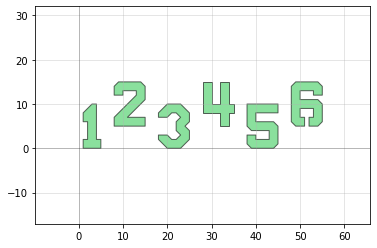

In [2]:
even = Group([t2,t4,t6])
even.movey(5)

qp(D) # quickplot it!

Now let's make a Group out of the odd numbers.  We're going to do this in a slightly different way -- simply by using the `+` operation.

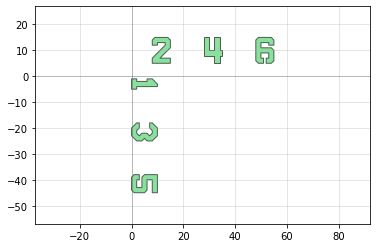

In [3]:
odd = t1 + t3 + t5 # Create the Group

# Let's rotate the odd numberse slightly by -10 degrees
odd.rotate(-90)

qp(D) # quickplot it!

Any PHIDL object can be  summed in this way to create a Group -- this includes Device, DeviceReference, Port, Polygon, CellArray, and Label. Groups themselves can also be summed. 

We can even add items to groups if we need to:

In [4]:
one_to_five = t1 + t2    # Create the group
one_to_five.add([t3,t4]) # Add elements with the "add" method
one_to_five += t5        # Equivalently, add elements with the '+=' operator

We can also perform the usual manipulations of PHIDL objects like asking where the center is, xmin, ymax, etc. Here we move the entire `one_to_five` group (which now has all numbers except for 6) down so the top is aligned with the y==0 axis

0.0


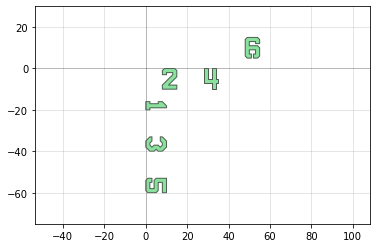

In [7]:
print(one_to_five.ymax)
one_to_five.ymax = 0

qp(D) # quickplot it!

## Align and distribute in Groups
Lastly, we can also align and distribute a Group if we want to.  Let's start with some misaligned objects:

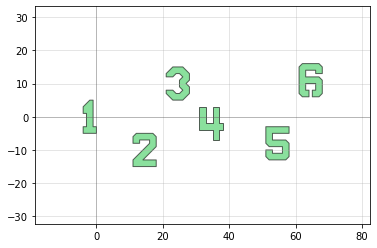

In [17]:
# Create a blank Device and add number shapes to it
D = Device()
t1 = D << pg.text('1').move([-5,-5])
t2 = D << pg.text('2').move([10,-15])
t3 = D << pg.text('3').move([20, 5])
t4 = D << pg.text('4').move([30, -7])
t5 = D << pg.text('5').move([50, -13])
t6 = D << pg.text('6').move([60,6])

qp(D) # quickplot it!

By forming a Group out of all the objects and using the `align()` command, we can easily align them:

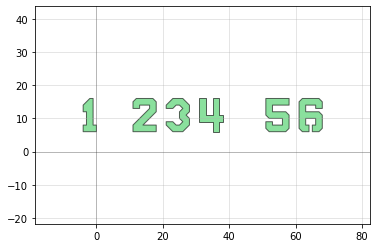

In [18]:
# Make a Group of all the number-shapes
all_numbers = (t1+t2+t3+t4+t5+t6)

# Align the ymax of all the numbers
all_numbers.align(alignment = 'ymax')

qp(D) # quickplot it!

It's aligned now, but still not evenly distributed.  Let's fix that by using the `distribute()` command:

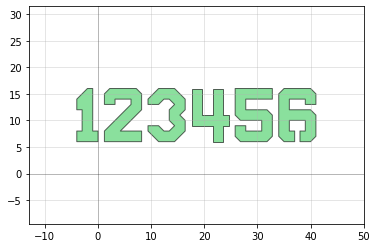

In [20]:
all_numbers.distribute(direction = 'x', spacing = 1.2, separation = True)

qp(D) # quickplot it!

We can even change the order of distribution -- it's determined by the order the objects are added to the Group.  If we want to reverse the order of the numbers, we simply need to make a new Group with the correct order:

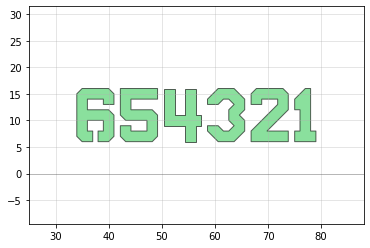

In [21]:
all_numbers_reverse = (t6 + t5 + t4 + t3 + t2 + t1)
all_numbers_reverse.distribute(direction = 'x', spacing = 1.2, separation = True)

qp(D) # quickplot it!